# <center> ML обучение с учителем

## 1. Линейная регрессия

In [51]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

C:\Users\Павел\AppData\Local\Temp\ipykernel_1968\546158159.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #установка стиля matplotlib


Будем работать с датасетом из библиотеки sklearn о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле datasets библиотеки sklearn. Давайте загрузим датасет с помощью функции load_boston() и выведем его описание, обратившись по ключу 'DESCR':

In [52]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

* CRIM — уровень преступности на душу населения по городам.;
* ZN — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
* INDUS — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
* CHAS —фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
* NOX —концентрация оксидов азота (в десятимиллионных долях);
* RM —среднее количество комнат в доме;
* AGE —доля зданий, построенных до 1940 г. и занимаемых владельцами;
* DIS — взвешенные расстояния до пяти бостонских центров занятости;
* RAD — индекс доступности радиальных автомобильных дорог;
* TAX — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
* PTRATIO — соотношение учеников и учителей по городам;
* B — 1000 (Bk — 0.63) , где Bk — доля граждан афроамериканского происхождения по городам;
* LSTAT — процент населения с низким статусом;
* MEDV — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Составим DataFrame из наших данных. Для этого обратимся по ключу 'data' к загруженным данным и получим numpy-массив, в котором содержится информация обо всех признаках, а по ключу 'feature_names' содержатся названия признаков. Обратившись по ключу 'target', можно получить numpy-вектор со значениями целевой переменной — медианной стоимости занимаемых домов (MEDV).

In [53]:
# Создаем DataFrame из загруженных матриц
boston_data = pd.DataFrame(
    data=boston.data, # данные
    columns=boston.feature_names # наиминование столбцов
)

# добавим в таблицу столбец с елевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
# info of DF
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0, 0.5, 'Correlation coefficient')

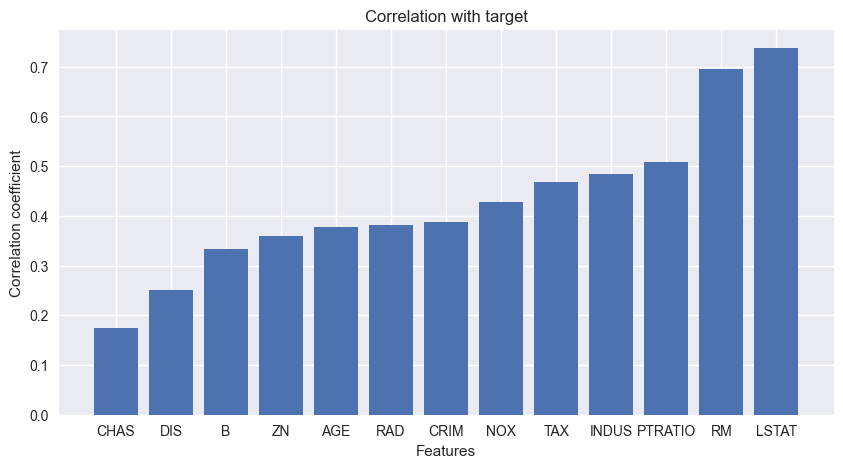

In [55]:
# Построим столбчатую диаграмму для определения корреляции с целевым признаком
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
corr_with_target = corr_with_target.drop('MEDV') # удалим показатель корреляции самого признака с собой
# Построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(corr_with_target.index, corr_with_target.values) # Как отображается столбчатая диаграмма
ax.set_title('Correlation with target')
ax.set_xlabel('Features') # название оси х
ax.set_ylabel('Correlation coefficient')

Построим линейную регрессию по формуле $\bar{w} = (X^T X)^{-1} *X^T *y $

Что есть X и y? Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. У нас матрица *X* — это таблица, состоящая из одного столбца (LSTAT), а  *y*— столбец с медианными ценами (MEDV):

In [56]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


Для начала вспомним, что для вычисления свободного члена $w_0$ необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции ones() из библиотеки numpy, а присоединить его к таблице X поможет функция column_stack().

Матричное умножение в numpy реализуется с помощью оператора @. Транспонирование осуществляется через .T, а обратная матрица вычисляется с помощью функции inv() из модуля linalg (модуля для линейной алгебры).

In [57]:
def linear_regression(X, y):
    # Создадим вектор из едениц(необходим при перемножении матриц)
    ones = np.ones(X.shape[0])
    # добавим к таблице первым столбцом
    X = np.column_stack([ones, X])
    # Вычислим обратную матрицу
    Q = np.linalg.inv(X.T @ X)
    w = Q @ X.T @ y
    return w

In [58]:
w = linear_regression(X, y)
print('vector w: {}'.format(w))
print('w0: {}'.format(w[0]))
print('w1: {}'.format(w[1]))

vector w: [34.55384088 -0.95004935]
w0: 34.55384087938308
w1: -0.9500493537579926


Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент $w_0$ имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент $w_1$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.

In [59]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))


Predicted value: 29.63


Давайте напишем функцию plot_regression_2d(), у которой будет три обязательных аргумента (матрица наблюдений X, столбец правильных ответов y и столбец с предсказаниями модели y_pred) и два аргумента по умолчанию (xlabel — подпись оси абсцисс и ylabel — подпись оси ординат).

In [60]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.scatter(X, y_true, alpha=0.7, label = 'sample data') # диаграмма рассеивания
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

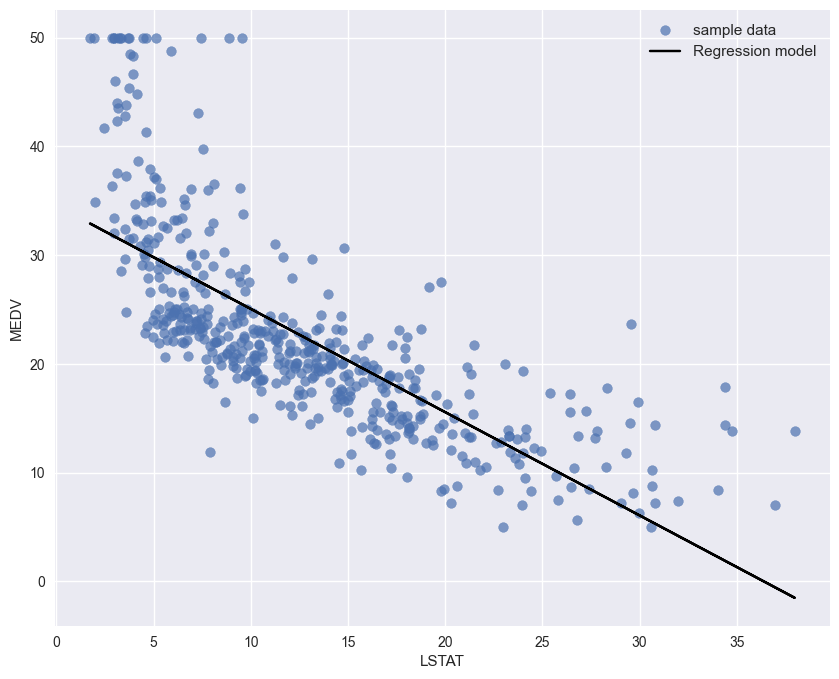

In [61]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Чтобы каждый раз не писать функции в sklearn есть модуль linear_model

In [62]:
from sklearn import linear_model

В модуле находится класс LinearRegression, который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Данный метод реализует формулу метода наименьших квадратов и рассчитает параметры модели самостоятельно. Чтобы получить свободный член $w_0$ нужно обратиться по атрибуту intercept_, а вектор параметров $w_1, w_2 ... w_m$  будет храниться в атрибуте coef_ (так как у нас один фактор в матрице X, то и коэффициент будет только один):

In [63]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 34.5538408793831
w1: [-0.95004935]


Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод predict(). В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

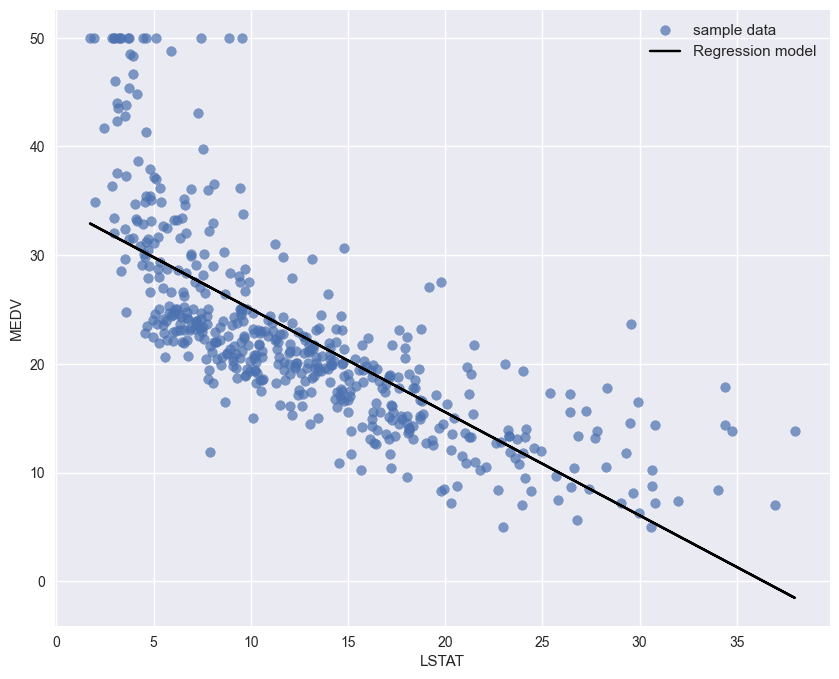

In [64]:
# построим предсказания
y_predict = lr_lstat.predict(X)

plot_regression_2d(X, y, y_predict)

In [65]:
# для того чтоб передать все признаки создадим новую матрицу
# сотсавим список факторов 
features = boston_data.drop('MEDV', axis=1).columns
# создадим матрицу и вектор ответов
X=boston_data[features]
y = boston_data['MEDV']
# создадим класс
lr_full = linear_model.LinearRegression()
# обучим модель
lr_full.fit(X, y)

LinearRegression()

In [66]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
#Составляем строку таблицы со свободным членом intercept=w0
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Визуализируем ошибки , это разность целевой метрики от предсказанной

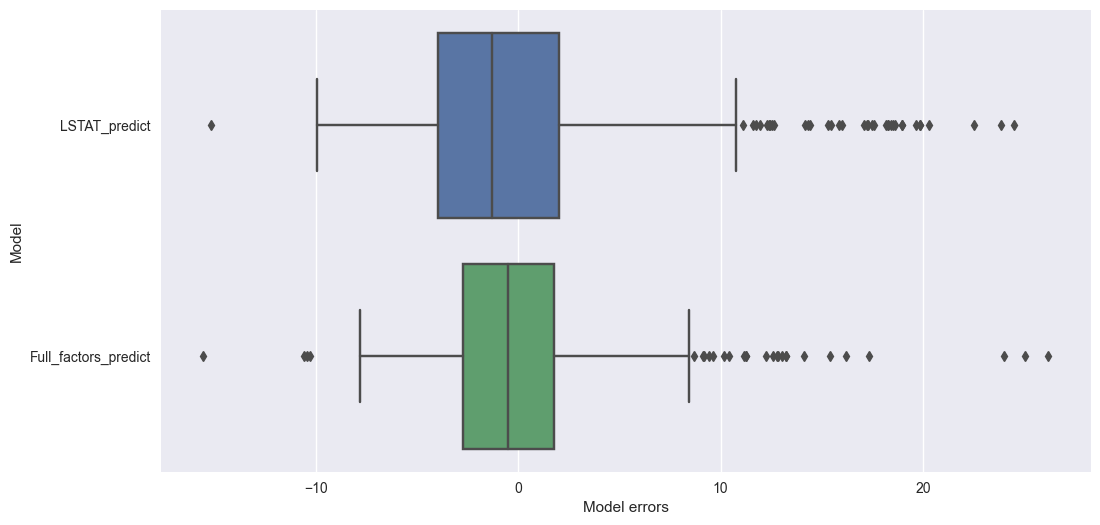

In [67]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [68]:
new_item = {
    'CRIM' : 0.35114,
    'ZN' : 0.00000,
    'INDUS' : 7.38000,
    'CHAS' : 0.00000,
    'NOX':0.49300,
    'RM':6.04100,
    'AGE':49.90000,
    'DIS':4.72110,
    'RAD' :5.00000,
    'TAX':287.00000,
    'PTRATIO':19.60000,
    'B':396.90000,
    'LSTAT':7.70000
}
df_item = pd.DataFrame(new_item, index=[0])
display(df_item)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


In [69]:
features = df_item.columns
X = df_item[features]
lr_full.predict(X)

array([22.86952447])

In [70]:
df_state = pd.read_csv('data/50_Startups.csv')
df_state.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [71]:
y = df_state['Profit']
df_state = df_state.drop('State', axis=1)
X = df_state[['R&D Spend', 'Administration','Marketing Spend']]

In [72]:

w = linear_regression(X, y)
print('vector w: {}'.format(w))
print('w0: {}'.format(w[0]))
print('w1: {}'.format(w[1]))
print('w2: {}'.format(w[2]))
print('w3: {}'.format(w[3]))

vector w: [ 5.01221930e+04  8.05715050e-01 -2.68159684e-02  2.72280648e-02]
w0: 50122.19298986448
w1: 0.805715049915742
w2: -0.02681596839474929
w3: 0.027228064800819796


## 2. Метрики регрессии. Недостатки аналитического решения

In [73]:
from sklearn import metrics

* mean_absolute_error() — расчёт MAE;
* mean_square_error() — расчёт MSE;
* mean_absolute_percentage_error() — расчёт MAPE;
* r2_score() — расчёт коэффициента детерминации .

In [74]:
y = boston_data['MEDV']
features = boston_data.drop('MEDV', axis=1).columns

In [75]:
# Создадим предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
# Расчитаем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
# Расчитаем RMSE
print(f'RMSE score {round(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)), 3)} thou. $')
# Расчитаем MAPE
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y, y_predict_lstat)*100,3)} thou. $')
# Рассчитаем R^2
print(f'R2 score {round(metrics.r2_score(y, y_predict_lstat), 3)}')

MAE score: 4.505 thou. $
RMSE score 6.203 thou. $
MAPE score 21.352 thou. $
R2 score 0.544


In [76]:
# Создаем предсказание по признаку LSTAT
y_predict_full = lr_full.predict(boston_data[features])
# Расчитаем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
# Расчитаем RMSE
print(f'RMSE score {round(np.sqrt(metrics.mean_squared_error(y, y_predict_full)), 3)} thou. $')
# Расчитаем MAPE
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y, y_predict_full)*100,3)} thou. $')
# Рассчитаем R^2
print(f'R2 score {round(metrics.r2_score(y, y_predict_full), 3)}')

MAE score: 3.271 thou. $
RMSE score 4.679 thou. $
MAPE score 16.417 thou. $
R2 score 0.741


Сравним полученные результаты:

: $MAE$ в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов. 

: $RMSE$ среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679.

: $MAPE$ первая модель ошибается на 21.352 %, а вторая — на 16.417 %.

: $R^2$ доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.

Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

In [77]:
# Task 3.2
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
print(f'RMSE score {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

RMSE score 5.746042116100439


In [78]:
# Task 3.3
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
print(f'R2 score {round(metrics.r2_score(y_true, y_pred), 3)}')

R2 score 0.708


## Линейная регрессия. Численное решение 
### Метод градиентного спуска

In [79]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
X = boston_data[['LSTAT']] # Матрица наблюдений
y = boston_data['MEDV'] # Вектор правильных ответов

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки sklearn — SGDRegressor. Она находится в том же модуле linear_model.

У класса SGDRegressor есть множество параметров. Например, параметр random_state отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в SGD случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра random_state равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число 42.

In [81]:
# Создадим класс линейной регрессии c SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
# Обучим модель и найдем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [82]:
# Выведем параметры обученной модели 
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


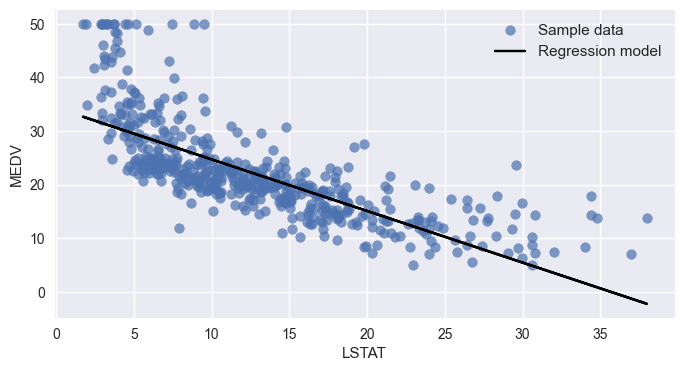

In [83]:
def plot_regressor_2d(X, y_true, y_pred, xlabel = 'LSTAT', ylabel = 'MEDV'):
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.scatter(X, y_true, alpha=0.7, label = 'Sample data') # диаграмма рассеивания
    ax.plot(X, y_pred, color = 'black', label = 'Regression model')
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

# Предсказываем медианную цену для всех участков из набора данных
y_pred = sgd_lr_lstat.predict(X)
# Строим визуализацию
plot_regressor_2d(X, y, y_pred)

Также мы можем рассчитать метрики для полученной модели, давайте например рассчитаем $R^2$

In [84]:
print(f'R^2 score {metrics.r2_score(y, y_pred) :.3f}')

R^2 score 0.542


Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. Как и раньше составим полную матрицу наблюдений  из всех факторов, которые нам даны. Обучим модель и выведем значения коэффициентов в виде DataFrame:

In [85]:
# Составим список факторов исключив целевой
features = boston_data.drop('MEDV', axis=1).columns
# Составим матрицу наблюдений и вектор ответов
X = boston_data[features]
y = boston_data['MEDV']

# Создадим объект класса лин регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
# Обучаем модель 
sgd_lr_full.fit(X, y)

# Составим таблицу из признаков и их значений
w_df_2 = pd.DataFrame({'Features' : features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df_2, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.



In [86]:
# Предскажим значения для всех данных 
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129979358707712.000


$R^2$ отрицательный. Да ещё какой! Напомним, отрицательный $R^2$  говорит о том, что модель абсолютно не описывает зависимости в данных.

Ответ очень простой — отсутствие масштабирования. Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.



In [87]:
from sklearn import preprocessing

In [88]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Попытка № 2 для обучения модели в стандартизированном виде

In [89]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [90]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


Важно! Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Плохие варианты работы модели при изменении параметро фунцкции SGD

In [91]:
# здаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))


R2 score: -335415038359.635


In [92]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


также мы видим предупреждение (warning), которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.



In [93]:
# Task 4.9 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    tol=0.1,
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


# Дилема смешения и разброса


In [94]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

В sklearn для разделения выборки на тренировочную и тестовую есть функция train_test_split() из модуля model_selection. Данная функция принимает следующие аргументы:

*X и y* — таблица с примерами и ответами к ним.

*random_state* — число, на основе которого генерируются случайные числа. Тренировочная и тестовая выборка генерируются случайно. Чтобы эксперимент был воспроизводимым, необходимо установить этот параметр в конкретное значение.

*test_size* — доля тестовой выборки. Параметр определяет, в каких пропорциях будет разделена выборка. Стандартные значения: 70/30, 80/20.

In [95]:
from sklearn.model_selection import train_test_split
# Разделяем выборку на тренировочную и тестовую в соотношении 70/30
# Установим random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
# Выведем результируюшие таблицы
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (354, 13) (354,)
Test:  (152, 13) (152,)


In [96]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

Train R^2: 0.743
Test R^2: 0.722


Итак, $R^2=0.743$ на тренировочной выборке и $R^2=0.722$ на тестовой выборке. То есть показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок).

## Полиномиальные признаки

Построить полиномиальную регрессию в sklearn очень просто. Для начала необходимо создать полиномиальные признаки с помощью объекта класса PolynomialFeatures из модуля preprocessing. Это преобразователь, который позволит сгенерировать полиномиальные признаки любой степени и добавить их в таблицу. У него есть два важных параметра:

- degree — степень полинома. По умолчанию используется степень 2.
- include_bias — включать ли в результирующую таблицу столбец из единиц (x в степени 0). По умолчанию стоит True, но лучше выставить его в значение False, так как столбец из единиц и так добавляется в методе наименьших квадратов.

In [97]:
# создаем генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# генерируем полиномиальный признак для тренировочной выборки
x_train_poly = poly.transform(X_train)
# генерируем полиномиальный признак для тестовой выборки
x_test_poly = poly.transform(X_test)

# выведем результирующие размеры таблицы
print(x_test_poly.shape)
print(x_train_poly.shape)

(152, 104)
(354, 104)


Теперь применим созданные массивы к функции линейной регрессии

In [98]:
# создадим объект класса lr
lr_model_poly = linear_model.LinearRegression()
# Обучим модель по МНК
lr_model_poly.fit(x_train_poly, y_train)
# Делаем предсказания для тренировочной модели
y_train_predict_poly = lr_model_poly.predict(x_train_poly)
# Делаем предсказания для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(x_test_poly)

print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))


Train R^2: 0.929
Test R^2: 0.268


Потрясающе! На тренировочной выборке коэффициент детерминации , то есть наша модель описывает почти 93 % зависимости в данных.

Смотрим на показатели тестовой выборки и сразу «спускаемся с небес на землю»:  . Метрика значительно ниже, чем на тренировочном наборе. Это и есть переобучение модели. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные, но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

Однако не стоит расстраиваться — есть один замечательный метод, который сможет спасти нашу модель от переобучения, и это *регуляризация*

## Регуляризация

Идея регуляризации состоит в том, что мы намеренно пытаемся *увеличить* **смещение** модели, чтобы *уменьшить* **разброс**. Закон баланса в действии!

Практика показывает, что обучение линейной регрессии с большим количеством признаков рекомендуется производить на стандартизованных (нормализованных) данных.

Примечание. Часто возникает вопрос: как правильно проводить стандартизацию/нормализацию при наличии тренировочной и тестовой выборки?

Вы обучаете (fit()) преобразование на тренировочной выборке и используете его с одними и теми же параметрами на тренировочной и тестовой выборке (transform()). Если производить подгонку на каждой из выборок в отдельности, вы внесёте смещение в модель.



In [99]:
# преобразуем наши данные
# инициализируем стандартизатор
scalrer = preprocessing.StandardScaler()
# Подгоняем параметры стандартизатора
scaler.fit(X_train)
# Произведем стандартизацию тренеровочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)

# Создадим генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
 
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


Главный параметр инициализации Lasso — это alpha, коэффициент регуляризации. По умолчанию alpha=1. Практика показывает, что это довольно сильная регуляризация для L1-метода. Давайте установим значение этого параметра на 0.1

In [101]:
# Создадим объект класса линейной регрессии с регуляризацией L1
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
# Обучим модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
# Сделаем предсказания для тренировочной выборки
y_train_predict_poly_2 = lasso_lr_poly.predict(X_train_scaled_poly)
# Сделаем предсказания дл тестовой выборки
y_test_predict_poly_2 = lasso_lr_poly.predict(X_test_scaled_poly)

print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly_2)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly_2)))

Train R^2: 0.879
Test R^2: 0.882


In [104]:
# Выведем коэффициенты модели обучения
print(np.round(lasso_lr_poly.coef_, 3))


[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


Обратите внимание: большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

Теперь давайте на тех же данных обучим модель линейной регрессии с L2-регуляризацией. Для L2-регуляризации параметр alpha по умолчанию равен 1. Давайте попробуем использовать значение параметра alpha=10:

In [105]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.907
Test R^2: 0.848


In [106]:
print(np.round(ridge_lr_poly.coef_, 3))


[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


Для подбора наилучшего значения альфа используем цикл


Давайте организуем процесс перебора параметров модели: создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. Такой список проще всего создать с помощью функции linspace() из библиотеки numpy.

В цикле будем обучать модель линейной регрессии и L1-регуляризацией (Lasso), вычислять значения метрики  на тренировочной и тестовой выборках и заносить результаты в списки train_scores и test_scores:

In [111]:
# Создадим список из 20 возможных значений альфа
alpha_list = np.linspace(0.0001, 1, 20)
# Создадим два списка для значений тренировочной и тестовой выборки
test_score = []
train_score =[]
# напишем цикл 
for alpha in alpha_list:
    # Создадим объект класса линейной регрессии с регуляризацией L1
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    # Обучим модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    # Сделаем предсказания для тренировочной выборки
    y_train_predict_poly_2 = lasso_lr_poly.predict(X_train_scaled_poly)
    # Сделаем предсказания дл тестовой выборки
    y_test_predict_poly_2 = lasso_lr_poly.predict(X_test_scaled_poly)
    # вычислим значение R^2 и занесем его в соответствуюший список
    train_score.append(metrics.r2_score(y_train, y_train_predict_poly_2))
    test_score.append(metrics.r2_score(y_test, y_test_predict_poly_2))

c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.729e+02, tolerance: 2.529e+00
  model = cd_fast.enet_coordinate_descent(


В результате выполнения данного кода в списках train_scores и test_scores появятся 20 различных значений $R^2$ на тренировочной и тестовой выборках.

Давайте построим линейные графики, которые покажут, как меняется метрика $R^2$ на тренировочной и тестовой выборках в зависимости от alpha:

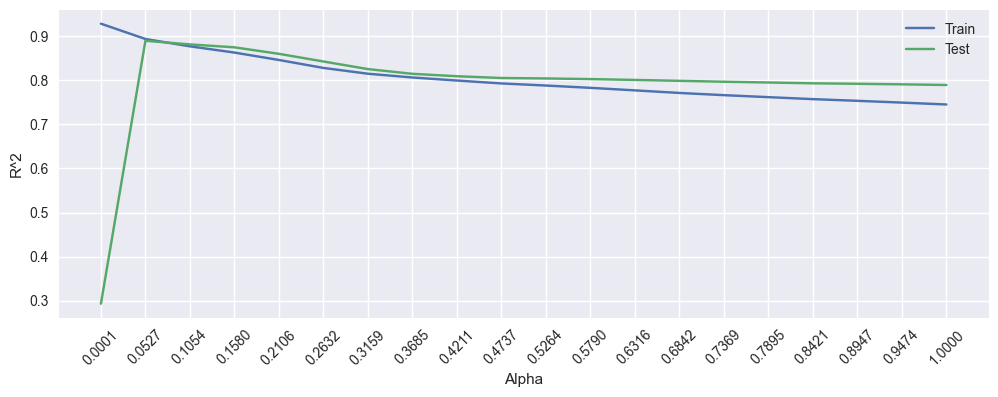

In [112]:
# Визуализируем изменения R^2
ffig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_score, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_score, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды


Необходимо подобрать alpha где значение максимально и имеет меньшую разницу с тренеровочной выборкой.

Давайте подставим значение alpha=0.0536 в модель Lasso и получим результат:

In [113]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.894
Test R^2: 0.890


Регуляризация присутствует и в модели SGDRegressor, причём она используется по умолчанию. В инициализаторе данного класса есть параметр penalty, который позволяет управлять методом регуляризации. Параметр может принимать значения 'l1', 'l2' и 'elasticnet'. По умолчанию используется L2-регуляризация (penalty='l2'). Коэффициент регуляризации (alpha) по умолчанию равен 0.0001 (относительно слабая регуляризация). Управляя двумя этими параметрами, вы можете настраивать тип регуляризации в SGD-методе и её «силу».